# Домашнее задание к лекции «Корреляция и корреляционный анализ»

## Задание 1

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

In [64]:
df = pd.read_csv('/Users/zorinapancenko/Desktop/python/Downloads/water.csv').drop('Unnamed: 0', axis=1)
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


Text(0.5, 1.0, 'Correlation between hardness of water and mortality in England and Wales')

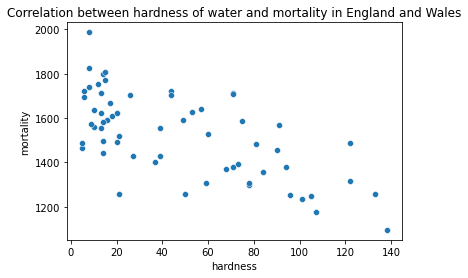

In [65]:
sns.scatterplot(data=df, x="hardness", y="mortality")
plt.title("Correlation between hardness of water and mortality in England and Wales")

In [66]:
pearson_cormatrix = df[['hardness', 'mortality']].corr()
pearson_cormatrix

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [67]:
spearman_cormatrix = df[['hardness', 'mortality']].corr(method='spearman')
spearman_cormatrix

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Таким образом, между жёсткостью воды и средней годовой смертностью существует умеренно-высокая обратная взаимосвязь (коэф-т корреляции < 0).
Явных выбросов нет, поэтому можно использовать как коэф-т Пирсона, так и коэф-т Спирмана.

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [69]:
x = df[['hardness']]
y = df['mortality']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

In [71]:
# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [72]:
model.coef_

array([-2.92598318])

In [73]:
model.intercept_

1669.293778080615

In [74]:
# Прогнозные значения
y_pred = model.predict(x_test)
y_pred

array([1470.32692165, 1312.32382978, 1312.32382978, 1441.06708982,
       1356.21357752, 1642.95992944, 1625.40403034, 1625.40403034,
       1607.84813124, 1496.6607703 , 1265.50809886, 1540.55051804,
       1525.92060212, 1616.62608079, 1590.29223215, 1423.51119073])

In [75]:
print('Коэффициент детерминации:', model.score(x_test, y_test))

Коэффициент детерминации: 0.5515748963147717


Следовательно, построенная модель линейной регрессии не очень хорошо объясняет зависимость между жесткостью воды и смертностью населения и желательно учесть дополнительные факторы.

Text(0, 0.5, 'mortality')

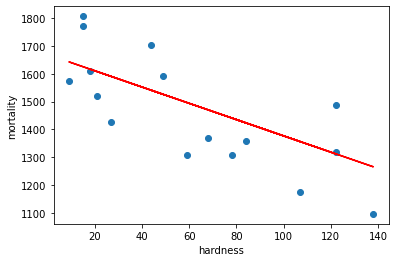

In [79]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')
plt.xlabel('hardness') 
plt.ylabel('mortality')

Как видно из графика, чем больше содержание кальция в воде (жесткость), тем ниже среднегодовая смертность.

In [19]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=11)

In [21]:
x_const = sm.add_constant(x_train)

In [22]:
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     52.06
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           6.29e-09
Time:                        15:31:34   Log-Likelihood:                -282.93
No. Observations:                  45   AIC:                             569.9
Df Residuals:                      43   BIC:                             573.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1719.7391     32.104     53.568      0.0

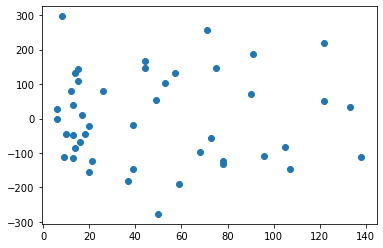

In [23]:
# график остатков
plt.scatter(x_const.iloc[:, 1], results.resid)

Остатки ведут себя достаточно хаотично, систематической составляющей и резких выбросов не наблюдается.

(array([ 1.,  2., 10.,  5.,  6.,  6.,  5.,  6.,  2.,  2.]),
 array([-276.84392056, -219.45911651, -162.07431245, -104.68950839,
         -47.30470433,   10.08009973,   67.46490379,  124.84970785,
         182.23451191,  239.61931597,  297.00412003]),
 <BarContainer object of 10 artists>)

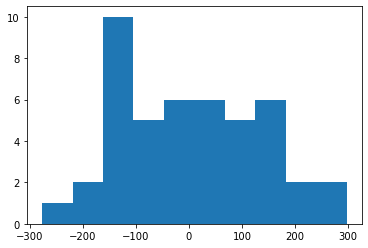

In [181]:
plt.hist(results.resid)

## Задание 2

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

#### Для северных городов

In [80]:
north = df[df['location'] == 'North']

Text(0.5, 1.0, 'Correlation between hardness of water and mortality in Northern towns')

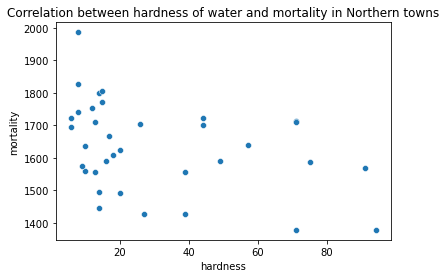

In [81]:
sns.scatterplot(data=north, x="hardness", y="mortality")
plt.title("Correlation between hardness of water and mortality in Northern towns")

In [26]:
pearson_cormatrix_ = north[['hardness', 'mortality']].corr()
pearson_cormatrix_

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [27]:
spearman_cormatrix_ = north[['hardness', 'mortality']].corr(method='spearman')
spearman_cormatrix_

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


Из графика видно, что для северных городов между жесткостью и смертностью сохраняется обратная взаимосвязь (коэфт-т корреляции < 0).

Однако здесь в данных присутствуют выбросы, поэтому для целей корреляционного анализа требуется использовать коэф-т Спирмана = -0.4.

In [82]:
# Построение модели линейной регрессии
x2 = north[['hardness']]
y2 = north['mortality']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state=11)
model2 = LinearRegression()
model2.fit(x_train2, y_train2)

LinearRegression()

In [83]:
model2.coef_

array([-1.3501933])

In [84]:
model2.intercept_

1685.7937401958968

In [85]:
y_pred2 = model2.predict(x_test2)
y_pred2

array([1669.59142056, 1558.87556972, 1562.92614963, 1608.83272193,
       1677.69258038, 1672.29180717, 1633.13620138, 1677.69258038,
       1633.13620138])

In [87]:
print('Коэффициент детерминации:', model2.score(x_test2, y_test2))

Коэффициент детерминации: 0.2113923312422903


Построенная однофакторная модель линейной регрессии весьма плохо объясняет зависимость между независимой и зависимой переменными.

In [33]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state=13)

In [34]:
x_const2 = sm.add_constant(x_train2)

In [35]:
model2 = sm.OLS(y_train2, x_const2)
results2 = model2.fit()

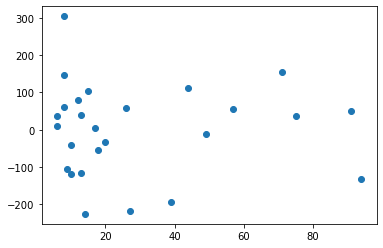

In [36]:
# график остатков
plt.scatter(x_const2.iloc[:, 1], results2.resid)

#### Для южных городов

In [92]:
south = df[df['location'] == 'South']

Text(0.5, 1.0, 'Correlation between hardness of water and mortality in Southern towns')

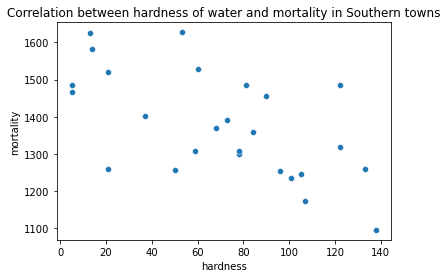

In [93]:
sns.scatterplot(data=south, x="hardness", y="mortality")
plt.title("Correlation between hardness of water and mortality in Southern towns")

In [94]:
pearson_cormatrix__ = south[['hardness', 'mortality']].corr()
pearson_cormatrix__

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [95]:
spearman_cormatrix__ = south[['hardness', 'mortality']].corr(method='spearman')
spearman_cormatrix__

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


Взаимосвязь между жесткостью воды и среднегодовой смертностью населения в южных городах также сохраняется и является более сильной, чем в северных городах (коэф-т корреляции -0.59 ближе к -1, чем -0.4).

Можно предположить, что существует какой-либо третий фактор, связанный с жесткостью воды и смертностью, который наблюдается именно в южных городах и влияет на результаты анализа.

In [96]:
# Построение модели линейной регрессии
x3 = north[['hardness']]
y3 = north['mortality']
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.25, random_state=10)
model3 = LinearRegression()
model3.fit(x_train3, y_train3)

LinearRegression()

In [97]:
model3.coef_

array([-2.13371399])

In [98]:
model3.intercept_

1703.4076384197522

In [99]:
y_pred3 = model3.predict(x_test3)
y_pred3

array([1675.66935656, 1673.53564257, 1665.00078661, 1660.73335863,
       1682.07049852, 1682.07049852, 1686.3379265 , 1509.23966537,
       1686.3379265 ])

In [100]:
print('Коэффициент детерминации:', model3.score(x_test3, y_test3))

Коэффициент детерминации: 0.04215090774891839


Коэф-т детерминации очень низкий, что подтверждает гипотезу о том, что в модели линейной регрессии для южных городов не учтен какой-либо очень важный фактор/факторы (например, показатель содержания другого микроэлемента в воде, как железо, или показатель чистоты воды).

In [101]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.25, random_state=10)

In [102]:
x_const3 = sm.add_constant(x_train3)

In [103]:
model3 = sm.OLS(y_train3, x_const3)
results3 = model3.fit()

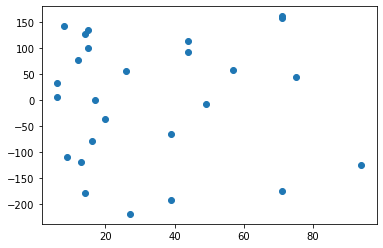

In [104]:
# график остатков
plt.scatter(x_const3.iloc[:, 1], results3.resid)